In [7]:
import numpy as np

import pandas as pd

import seaborn as sns

from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE, RFECV
from sklearn.svm import SVC

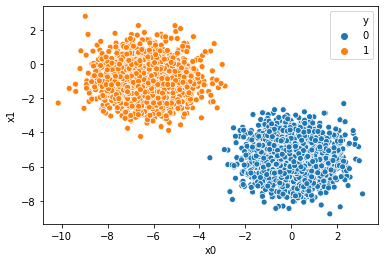

In [72]:
# cantidad de ruido
NOISE = 30

# creamos gausianas en un dataframe
X, y = make_blobs(n_samples=4000, centers=2, n_features=2,
                  )

df = pd.DataFrame(X, columns=["x0", "x1"])
df["y"] = y

# agregamos ruido
for n in range(NOISE):
    df[f"xn{n}"] = np.random.rand(len(y))

# volcemos a dividir
X_columns = df.columns[df.columns.str.startswith("x")].values
X = df[X_columns].values
X = StandardScaler().fit_transform(X)

y = df.y.values

sns.scatterplot(data=df, x="x0", y="x1", hue="y")

In [73]:
X = df[
    df.columns[df.columns.str.startswith("x")]].values
y = df.y.values

estimator = SVC(kernel="linear")
selector = RFECV(estimator, cv=5)
selector = selector.fit(X, y)

print(selector.ranking_)
print(selector.support_)
print(X_columns[selector.support_])

[ 1  1 24 13 18  7  5 29  6 23 15 26  3 22 10 30 27 20 12  2  9  4 31 19
 16 17 28  8 11 14 25 21]
[ True  True False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False]
['x0' 'x1']


NameError: name 'plt' is not defined